In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [32]:
#Leemos el CSV
nlp = pd.read_csv('data/train.csv')

In [33]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [34]:
nlp['size'] = nlp['text'].str.len()

In [35]:
nlp.head(10)

,id,keyword,location,text,target,size
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


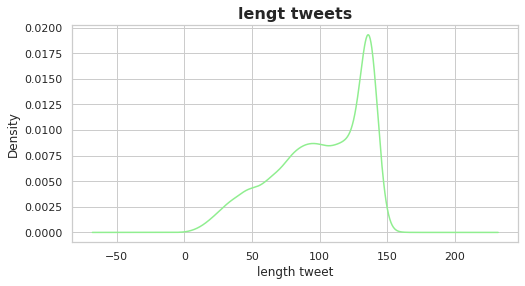

In [36]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('lengt tweets',fontsize=16,fontweight='bold')
ax.set_xlabel('length tweet')
nlp['size'].plot.kde(color='lightgreen', figsize=(8, 4))
plt.show()

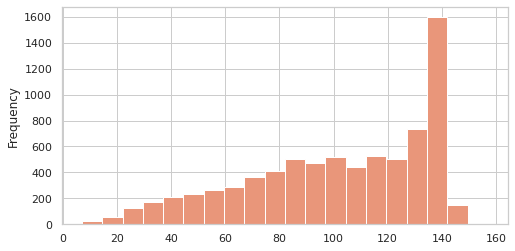

In [37]:
fig=plt.figure()
ax = fig.add_subplot(111)

#plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
#ax.set_xlabel('year of award')
nlp['size'].plot.hist(color='darksalmon', figsize=(8, 4), bins=20)

plt.show()

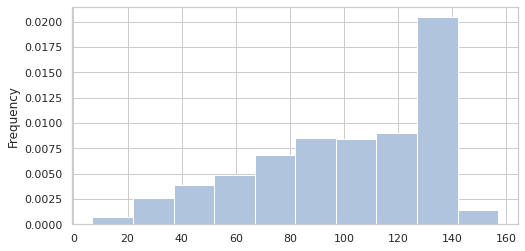

In [38]:
nlp['size'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
nlp['size'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

plt.show()

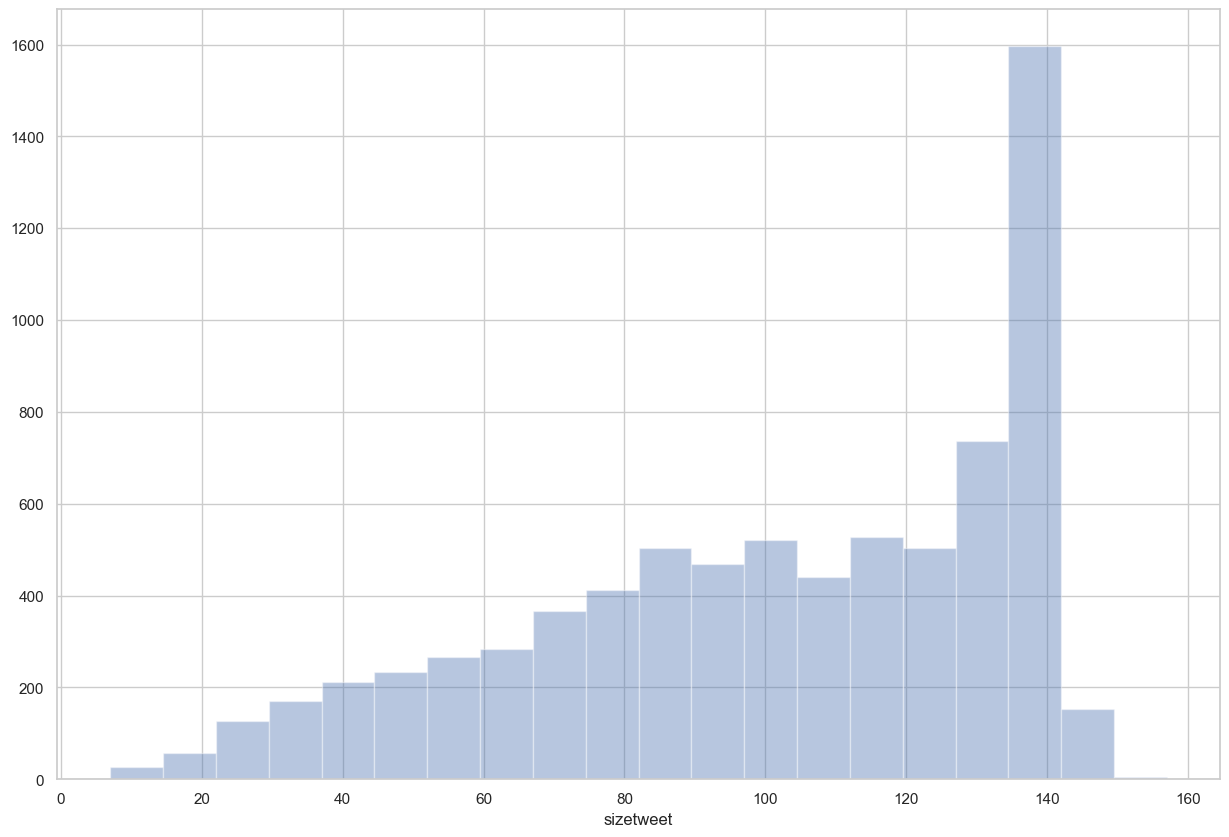

In [61]:
sns.distplot(nlp['sizetweet'], kde=False, bins=20)


In [40]:
nlp['promedio'] = nlp['size'].mean()
nlp['masquepromedio'] = nlp['promedio']>nlp['size']
masqueprom['Verd'] = nlp[nlp['masquepromedio']==True].masquepromedio.count()
masqueprom['False'] = nlp[nlp['masquepromedio']==False].masquepromedio.count()
sizes = [masqueprom['False'], masqueprom['Verd']]
sizes

NameError: name 'masqueprom' is not defined

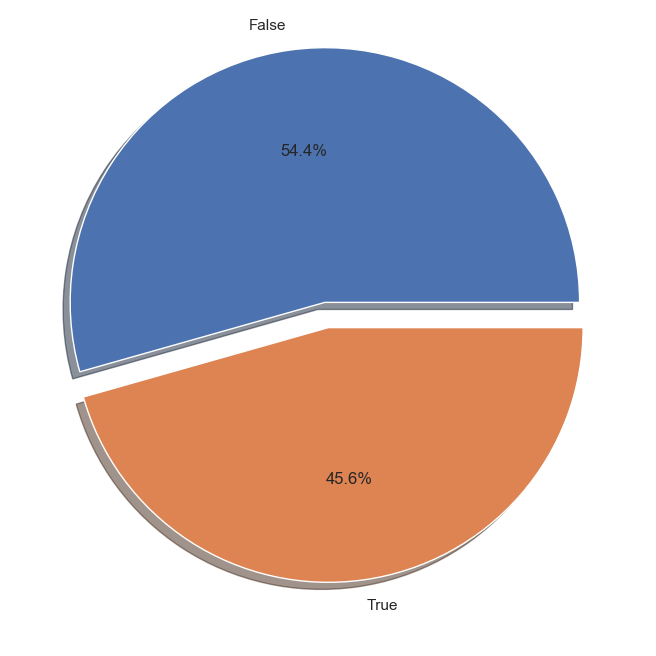

In [110]:
#plot = df.plot.pie(y='mass', figsize=(5, 5))
#masqueprom.plot.pie(figsize=(8, 4))
plt.figure(figsize=(11.7, 8.27))
plt.pie(sizes, labels = ('False', 'True'), autopct='%1.1f%%', shadow=True, startangle=0, explode=(0.1, 0))
plt.show()

In [6]:
nlp['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [41]:
nlp['size'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: size, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


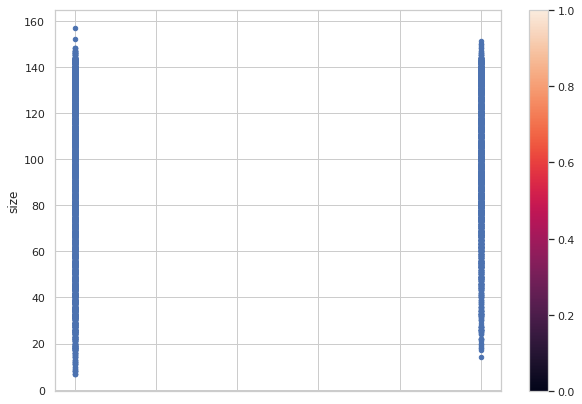

In [43]:
nlp.plot.scatter(y = 'size', x = 'target', figsize=(10, 7), colormap='viridis')

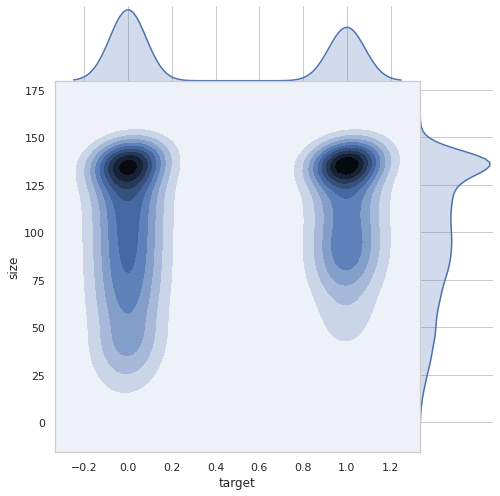

In [44]:
g = sns.jointplot(nlp['target'], nlp['size'], kind="kde", height=7, space=0)

In [63]:
target1 = nlp.loc[nlp['target']==1,:]
target0 = nlp.loc[nlp['target']==0,:]
targ1 = target1['size'].value_counts().to_frame().reset_index()
targ1['target'] = 1
targ0 = target0['size'].value_counts().to_frame().reset_index()
targ0['target'] = 0

In [77]:
target0['size'].max()

157

In [98]:
targets_total = targ1.append(targ0)
targets_total.rename(columns = {'index' : 'cant_veces', 'size' : 'len_tweet'}, inplace = True)
targets_total.head()

,cant_veces,len_tweet,target
0,136,277,1
1,137,125,1
2,135,119,1
3,139,115,1
4,140,113,1


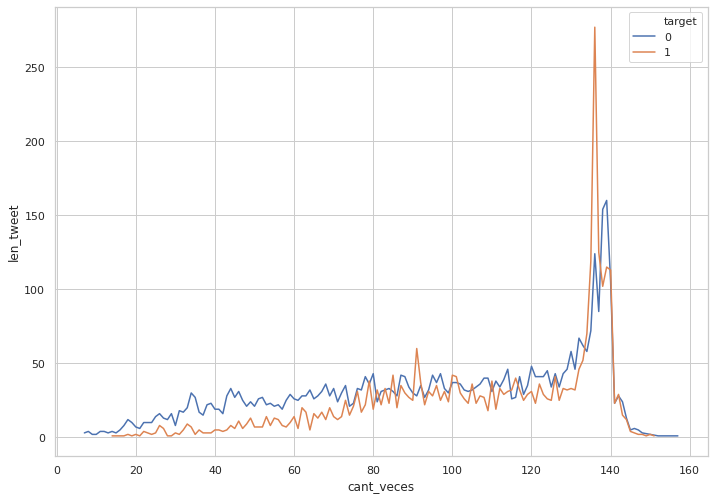

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x = 'cant_veces' , y = 'len_tweet' ,data=targets_total, hue="target", color='blue')
ax = plt.gca()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(y="cant_veces", x="len_tweet", hue="target", data=targets_total, size = 'cant_veces')
ax = plt.gca()

In [108]:
target1mas100 = target1.loc[target1['size']>100,:]
target1mas100['size'].value_counts()

136    277
137    125
135    119
139    115
140    113
138    102
134     70
133     52
132     46
126     41
101     41
116     40
110     38
105     36
122     36
128     33
112     33
130     33
115     32
117     32
131     32
129     32
120     31
114     31
102     30
113     29
123     29
142     29
119     29
107     28
108     27
124     26
103     26
125     25
118     25
127     25
106     23
104     23
141     23
121     23
111     19
109     18
143     15
144     12
145      4
146      3
150      2
148      2
147      2
149      1
151      1
Name: size, dtype: int64